In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from umap import UMAP
import plotly.express as px
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter("ignore")

# Introduction

- The Human Development Report is an annual report published by the United Nations Development Programme.
- The report aims to quantify multiple aspects of life, through three overarching dimensions... 
    - Education
    - Health
    - Standard of Living
- The results of the Human Development Report can be summarized by a country's Human Development Index score.

# Data

- I was able to download this data from the <a href="http://hdr.undp.org/en/data">HDR's homepage</a>.
- The raw dataset is comprised of an Excel workbook made of 19 sheets, with 210 values per sheet and a grand total of 232 variables.
- After prepping the data for analysis, I was left with a 189 X 222 dataframe.

In [2]:
X = pd.read_csv('hdi_df.csv', index_col= 0)

In [3]:
X.iloc[:,:222]

,HDI rank,Human development index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,1990 HDI,2000 HDI,2010 HDI,...,Skilled Labor Force,Exports Concentration Index,Research and Development Expenditure,Old Age Dependency Rate,Military Expenditure (% of GDP),Ratio of education and health expenditure to military expenditure,Loss in HDI Value due to Inequality,Gender Inequality Index,Income Share of Poorest 40%,HDI group
Norway,1.0,0.954,82.3,18.1,12.6,68059.0,5.0,0.850000,0.917000,0.942,...,84.300000,0.368000,2.000000,31.900000,1.600000,11.700000,0.300000,-3.700000,0.300000,1.0
Switzerland,2.0,0.946,83.6,16.2,13.4,59375.0,8.0,0.832000,0.889000,0.932,...,86.500000,0.246000,3.400000,37.900000,0.700000,25.500000,-0.400000,-3.800000,0.800000,1.0
Ireland,3.0,0.942,82.1,18.8,12.5,55660.0,9.0,0.764000,0.857000,0.890,...,84.900000,0.269000,1.200000,27.800000,0.300000,32.700000,-2.300000,-4.000000,0.400000,1.0
Germany,4.0,0.939,81.2,17.1,14.1,46946.0,15.0,0.801000,0.869000,0.920,...,87.400000,0.093000,2.900000,44.000000,1.200000,13.500000,0.500000,-2.200000,0.000000,1.0
"Hong Kong, China (SAR)",4.0,0.939,84.7,16.5,12.0,60221.0,5.0,0.781000,0.827000,0.901,...,77.000000,0.286000,0.800000,43.200000,2.068889,11.023256,-0.950000,-2.947727,0.089189,1.0
Australia,6.0,0.938,83.3,22.1,12.7,44097.0,15.0,0.866000,0.898000,0.926,...,78.900000,0.291000,1.900000,31.000000,1.900000,7.500000,0.400000,-2.000000,-0.600000,1.0
Iceland,6.0,0.938,82.9,19.2,12.5,47566.0,12.0,0.804000,0.861000,0.892,...,74.500000,0.461000,2.100000,31.800000,2.068889,11.023256,-1.700000,-4.200000,0.200000,1.0
Sweden,8.0,0.937,82.7,18.8,12.4,47955.0,9.0,0.816000,0.897000,0.906,...,86.800000,0.097000,3.300000,36.400000,1.000000,17.200000,-0.400000,-1.800000,-0.400000,1.0
Singapore,9.0,0.935,83.5,16.3,11.5,83793.0,-6.0,0.718000,0.818000,0.909,...,65.900000,0.269000,2.200000,34.500000,3.100000,2.100000,-0.950000,-4.700000,0.089189,1.0
Netherlands,10.0,0.933,82.1,18.0,12.2,50013.0,3.0,0.830000,0.876000,0.911,...,78.400000,0.082000,2.000000,40.800000,1.200000,13.900000,-2.100000,-3.900000,0.300000,1.0


# Scale data

In [4]:
scale = StandardScaler()
X_std = scale.fit_transform(X.iloc[:,:222])

# PCA Dimension Reduction

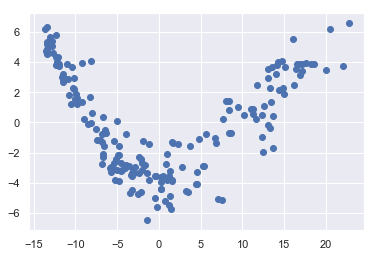

In [5]:
from sklearn.decomposition import PCA

#Reduce total to 20 components
pca = PCA(n_components= 20, random_state= 123)
pca_results = pca.fit_transform(X_std)

plt.scatter(pca_results[:, 0],pca_results[:, 1])

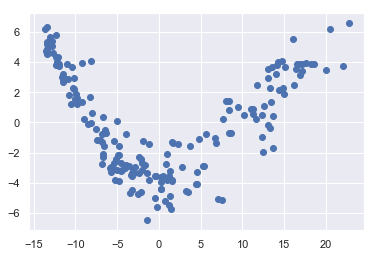

In [6]:
#Reduce 20 components to 2 components

pca = PCA(n_components= 2, random_state= 123)
pca_results_1 = pca.fit_transform(pca_results)

plt.scatter(pca_results_1[:, 0],pca_results_1[:, 1])

# UMAP Dimension Reduction (100-20-2 Components)

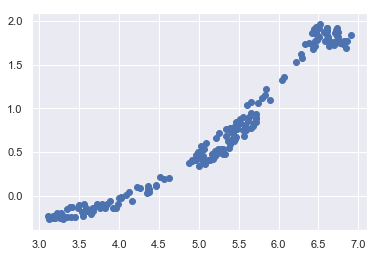

In [7]:
#Reduce total to 100 components

umap_a = UMAP(n_components= 100, random_state= 123)
umap_results_a = umap_a.fit_transform(X_std)

plt.scatter(umap_results_a[:, 0],umap_results_a[:, 1])

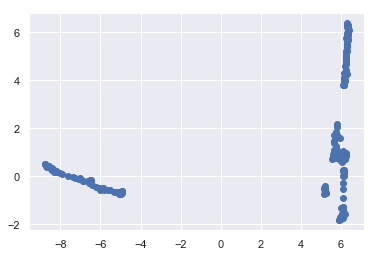

In [8]:
#Reduce 100 components to 20 components

umap_b = UMAP(n_components= 20, random_state= 123)
umap_results_b = umap_b.fit_transform(umap_results_a)

plt.scatter(umap_results_b[:, 0],umap_results_b[:, 1])

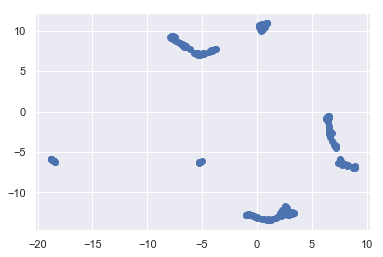

In [9]:
#Reduce 20 components to 2 components

umap_c = UMAP(n_components= 2, random_state= 123)
umap_results_c = umap_c.fit_transform(umap_results_b)

plt.scatter(umap_results_c[:, 0],umap_results_c[:, 1])

# UMAP Dimension Reduction (20 Components)

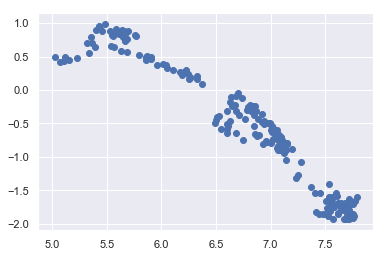

In [10]:
#Reduce total to 20 components

umap_1a = UMAP(n_components= 20, random_state= 123)
umap_results_1a = umap_1a.fit_transform(X_std)

plt.scatter(umap_results_1a[:, 0],umap_results_1a[:, 1])

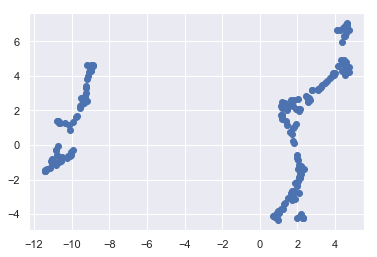

In [11]:
#Reduce 20 components to 2 components

umap_1b = UMAP(n_components= 2, random_state= 123)
umap_results_1b = umap_1b.fit_transform(umap_results_1a)

plt.scatter(umap_results_1b[:, 0],umap_results_1b[:, 1])

# UMAP Dimension Reduction (2 Components)

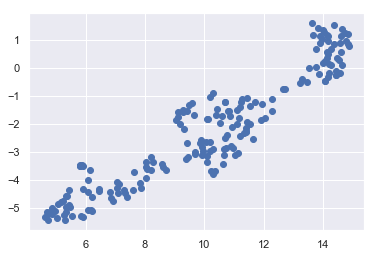

In [12]:
#Reduce total to 2 components

umap_2 = UMAP(n_components= 2, random_state= 123)
umap_results_2 = umap_2.fit_transform(X_std)

plt.scatter(umap_results_2[:, 0],umap_results_2[:, 1])

# K-Means Clustering

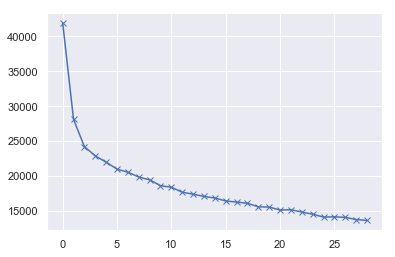

In [13]:
#Elbow plot to optimal numder of clusters

n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i, random_state= 123)
    kmean.fit(X_std)
    cost.append(kmean.inertia_)

plt.plot(cost, 'bx-')

In [86]:
#Clustering using all features

k_means = KMeans(n_clusters=2, random_state=123)
y_pred = k_means.fit_predict(X_std)

metrics.silhouette_score(X_std, y_pred)

0.3114235926299261

In [89]:
#Clustering using 100 features

k_means_a = KMeans(n_clusters=3, random_state=123)
y_pred_a = k_means_a.fit_predict(umap_results_a)

metrics.silhouette_score(umap_results_a, y_pred_a)

0.66093415

In [97]:
#Clustering using 20 from 100 features

k_means_b = KMeans(n_clusters=3, random_state=123)
y_pred_b = k_means_b.fit_predict(umap_results_b)

metrics.silhouette_score(umap_results_b, y_pred_b)

0.73138136

In [111]:
#Clustering using 2 from 20 from 100 features

k_means_c = KMeans(n_clusters=6, random_state=123)
y_pred_c = k_means_c.fit_predict(umap_results_c)

metrics.silhouette_score(umap_results_c, y_pred_c)

0.7927686

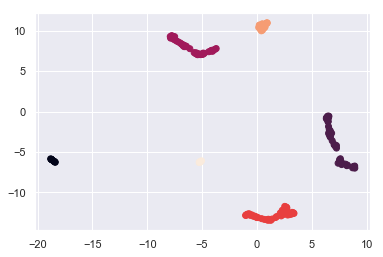

In [112]:
plt.scatter(umap_results_c[:, 0],umap_results_c[:, 1], c = y_pred_c)

In [113]:
X['K-Means Clusters'] = y_pred_c

In [116]:
#Clustering using 20 Components(UMAP)

k_means_1a = KMeans(n_clusters=3, random_state=123)
y_pred_1a = k_means_1a.fit_predict(umap_results_1a)

metrics.silhouette_score(umap_results_1a, y_pred_1a)

0.6553693

In [119]:
#Clustering using 2 Components(UMAP) reduced from 20 Components(UMAP)

k_means_1b = KMeans(n_clusters=2, random_state=123)
y_pred_1b = k_means_1b.fit_predict(umap_results_1b)

metrics.silhouette_score(umap_results_1b, y_pred_1b)

0.71128565

In [122]:
#Clustering using 2 Components

k_means_2 = KMeans(n_clusters=3, random_state=123)
y_pred_2 = k_means_2.fit_predict(umap_results_2)

metrics.silhouette_score(umap_results_2, y_pred_2)

0.65564454

# Hierarchical Clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering
#Clustering using all features

agg_cluster = AgglomerativeClustering(n_clusters=4, affinity= 'l1', linkage= 'average')
clusters = agg_cluster.fit_predict(X_std)

metrics.silhouette_score(X_std, clusters, metric= 'l1')

0.3190156966338038

In [24]:
#Clustering using 100 features

agg_cluster_a = AgglomerativeClustering(n_clusters=3, affinity= 'l1', linkage= 'average')
clusters_a = agg_cluster_a.fit_predict(umap_results_a)

metrics.silhouette_score(umap_results_a, clusters_a, metric= 'l1')

0.6637371530822682

In [127]:
#Clustering using 20 from 100 features

agg_cluster_b = AgglomerativeClustering(n_clusters=6, affinity= 'l1', linkage= 'single')
clusters_b = agg_cluster_b.fit_predict(umap_results_b)

metrics.silhouette_score(umap_results_b, clusters_b, metric= 'l1')

0.583631986865034

In [130]:
#Clustering using 2 from 20 from 100 features

agg_cluster_c = AgglomerativeClustering(n_clusters = 6, affinity= 'l1', linkage= 'single')
clusters_c = agg_cluster_c.fit_predict(umap_results_c)

metrics.silhouette_score(umap_results_c, clusters_c, metric= 'l1')

0.8033322882293648

In [131]:
X['Hierarchical Clusters'] = clusters_c

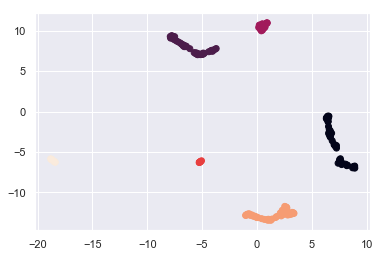

In [132]:
plt.scatter(umap_results_c[:, 0],umap_results_c[:, 1], c = clusters_c)

In [29]:
#Clustering using 20 components from total

agg_cluster_1a = AgglomerativeClustering(n_clusters=3, affinity= 'l1', linkage= 'average')
clusters_1a = agg_cluster_1a.fit_predict(umap_results_1a)

metrics.silhouette_score(umap_results_1a, clusters_1a, metric= 'l1')

0.6354046576349553

In [30]:
#Clustering using 2 from 20 components

agg_cluster_1b = AgglomerativeClustering(n_clusters=4, affinity= 'l1', linkage= 'average')
clusters_1b = agg_cluster_1b.fit_predict(umap_results_1b)

metrics.silhouette_score(umap_results_1b, clusters_1b, metric= 'l1')

0.6724623021385344

In [31]:
#Clustering using 2 components from total

agg_cluster_2 = AgglomerativeClustering(n_clusters=3, affinity= 'l1', linkage= 'average')

clusters_2 = agg_cluster_2.fit_predict(umap_results_2)

metrics.silhouette_score(umap_results_2, clusters_2, metric= 'l1')

0.6690560424459615

# GMM

In [32]:
from sklearn.mixture import GaussianMixture

#Clustering using all features

gmm_cluster = GaussianMixture(n_components=2 ,random_state=123)
g_clusters = gmm_cluster.fit_predict(X_std)

metrics.silhouette_score(X_std, g_clusters)

0.3114235926299261

In [33]:
#Clustering using 100 features

gmm_cluster_a = GaussianMixture(n_components=3 ,random_state=123)
g_clusters_a = gmm_cluster_a.fit_predict(umap_results_a)

metrics.silhouette_score(umap_results_a, g_clusters_a)

0.66093415

In [34]:
#Clustering using 20 from 100 features

gmm_cluster_b = GaussianMixture(n_components=5,random_state=123)
g_clusters_b = gmm_cluster_b.fit_predict(umap_results_b)

metrics.silhouette_score(umap_results_b, g_clusters_b)

0.60595685

In [135]:
#Clustering using 2 from 20 from 100 features

gmm_cluster_c = GaussianMixture(n_components=6,random_state=123)
g_clusters_c = gmm_cluster_c.fit_predict(umap_results_c)

metrics.silhouette_score(umap_results_c, g_clusters_c)

0.7927686

In [136]:
X['Gaussian clusters'] = g_clusters_c

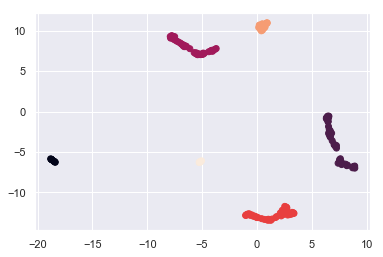

In [137]:
plt.scatter(umap_results_c[:, 0],umap_results_c[:, 1], c = g_clusters_c)

In [38]:
#Clustering using 20 components from total

gmm_cluster_1a = GaussianMixture(n_components=3 ,random_state=123)
g_clusters_1a = gmm_cluster_1a.fit_predict(umap_results_1a)

metrics.silhouette_score(umap_results_1a, g_clusters_1a)

0.65422213

In [39]:
#Clustering using 2 from 20 components

gmm_cluster_1b = GaussianMixture(n_components = 3,random_state=123)
g_clusters_1b = gmm_cluster_1b.fit_predict(umap_results_1b)

metrics.silhouette_score(umap_results_1b, g_clusters_1b)

0.6875473

In [40]:
#Clustering using 2 components from total

gmm_cluster_2 = GaussianMixture(n_components=3 ,random_state=123)
g_clusters_2 = gmm_cluster_2.fit_predict(umap_results_2)

metrics.silhouette_score(umap_results_2, g_clusters_2)

0.6523085

# Affinity Propagation

In [41]:
from sklearn.cluster import AffinityPropagation

aff_prop = AffinityPropagation(damping= 0.5)
a_clusters = aff_prop.fit_predict(X_std)

metrics.silhouette_score(X_std, a_clusters)

0.06848751090529363

In [42]:
#Clustering using 100 features

aff_prop_a = AffinityPropagation(damping= 0.7)
a_clusters_a = aff_prop_a.fit_predict(umap_results_a)

metrics.silhouette_score(umap_results_a, a_clusters_a)

0.49990028

In [43]:
#Clustering using 20 from 100 features

aff_prop_b = AffinityPropagation(damping= 0.7)
a_clusters_b = aff_prop_b.fit_predict(umap_results_b)

metrics.silhouette_score(umap_results_b, a_clusters_b)

0.63648

In [145]:
#Clustering using 2 from 20 from 100 features

aff_prop_c = AffinityPropagation(damping= 0.9)
a_clusters_c = aff_prop_c.fit_predict(umap_results_c)

metrics.silhouette_score(umap_results_c, a_clusters_c)

0.7679223

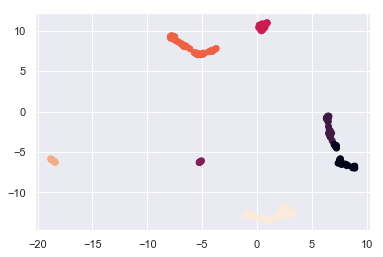

In [146]:
plt.scatter(umap_results_c[:, 0],umap_results_c[:, 1], c = a_clusters_c)

In [46]:
X['Affinity Clusters'] = a_clusters_c

In [47]:
#Clustering using 20 components from total

aff_prop_1a = AffinityPropagation(damping= 0.6)
a_clusters_1a = aff_prop_1a.fit_predict(umap_results_1a)

metrics.silhouette_score(umap_results_1a, a_clusters_1a)

0.39105588

In [48]:
#Clustering using 2 from 20 components

aff_prop_1b = AffinityPropagation(damping= 0.6)
a_clusters_1b = aff_prop_1b.fit_predict(umap_results_1b)

metrics.silhouette_score(umap_results_1b, a_clusters_1b)

0.63299996

In [49]:
aff_prop = AffinityPropagation(damping= 0.5)
a_clusters_2 = aff_prop.fit_predict(umap_results_2)

metrics.silhouette_score(umap_results_2, a_clusters_2)

0.46441433

# Mean Shift

In [50]:
from sklearn.cluster import MeanShift

mn_shft = MeanShift(bandwidth=22)
m_clusters = mn_shft.fit_predict(X_std)

metrics.silhouette_score(X_std, m_clusters)

0.32148127090266077

In [51]:
#Clustering using 100 features

mn_shft_a = MeanShift(bandwidth = 1.9)
m_clusters_a = mn_shft_a.fit_predict(umap_results_a)

metrics.silhouette_score(umap_results_a, m_clusters_a)

0.65843946

In [52]:
#Clustering using 20 from 100 features

mn_shft_b = MeanShift(bandwidth = 3)
m_clusters_b = mn_shft_b.fit_predict(umap_results_b)

metrics.silhouette_score(umap_results_b, m_clusters_b)

0.6699235

In [162]:
#Clustering using 2 from 20 from 100 features

mn_shft_c = MeanShift(bandwidth = 5)
m_clusters_c = mn_shft_c.fit_predict(umap_results_c)

metrics.silhouette_score(umap_results_c, m_clusters_c)

0.7927686

In [163]:
X['Mean Shift Clusters'] = m_clusters_c

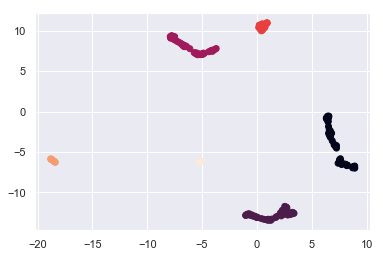

In [164]:
plt.scatter(umap_results_c[:, 0],umap_results_c[:, 1], c = m_clusters_c)

In [56]:
#Clustering using 20 components from total

mn_shft_1a = MeanShift(bandwidth= 2)
m_clusters_1a = mn_shft_1a.fit_predict(umap_results_1a)

metrics.silhouette_score(umap_results_1a, m_clusters_1a)

0.6537091

In [57]:
#Clustering using 2 from 20 components

mn_shft_1b = MeanShift(bandwidth=3)
m_clusters_1b = mn_shft_1b.fit_predict(umap_results_1b)

metrics.silhouette_score(umap_results_1b, m_clusters_1b)

0.6875473

In [58]:
#Clustering using 2 components from total

mn_shft_2 = MeanShift(bandwidth= 2.2)
m_clusters_2 = mn_shft_2.fit_predict(umap_results_2)
metrics.silhouette_score(umap_results_2, m_clusters_2)

0.65564454

# DBSCAN

In [59]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps= 24.7)
d_clusters = dbscan.fit_predict(X_std)

metrics.silhouette_score(X_std, d_clusters)

0.3812665695321814

In [60]:
#Clustering using 100 features

dbscan_a = DBSCAN(eps= .6)
d_clusters_a = dbscan_a.fit_predict(umap_results_a)

metrics.silhouette_score(umap_results_a, d_clusters_a)

0.50257576

In [61]:
#Clustering using 20 from 100 features

dbscan_b = DBSCAN(eps= 2)
d_clusters_b = dbscan_b.fit_predict(umap_results_b)

metrics.silhouette_score(umap_results_b, d_clusters_b)

0.43900996

In [171]:
#Clustering using 2 from 20 from 100 features

dbscan_c = DBSCAN(eps= 2)
d_clusters_c = dbscan_c.fit_predict(umap_results_c)

metrics.silhouette_score(umap_results_c, d_clusters_c)

0.7927686

In [172]:
X['DBSCAN Clusters'] = d_clusters_c

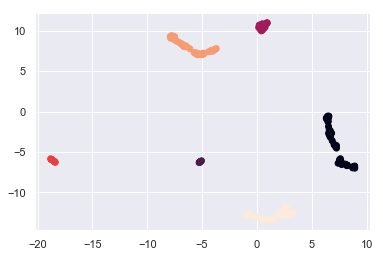

In [173]:
plt.scatter(umap_results_c[:, 0],umap_results_c[:, 1], c = d_clusters_c)

In [65]:
#Clustering using 20 components from total

dbscan_1a = DBSCAN(eps= .6)
d_clusters_1a = dbscan_1a.fit_predict(umap_results_1a)

metrics.silhouette_score(umap_results_1a, d_clusters_1a)

0.50136983

In [66]:
#Clustering using 2 from 20 components

dbscan_1b = DBSCAN(eps= 6)
d_clusters_1b = dbscan_1b.fit_predict(umap_results_1b)

metrics.silhouette_score(umap_results_1b, d_clusters_1b)

0.71128565

In [67]:
#Clustering using 2 components from total

dbscan_2 = DBSCAN(eps= .39)
d_clusters_2 = dbscan_2.fit_predict(umap_results_2)

metrics.silhouette_score(umap_results_2, d_clusters_2)

0.45575762

In [181]:
autumngothic = ["#001524", "#15616D", "#FFECD1", "#FF7D00", "#78290F"]

palette = ['#4B3F72','#AB81CD','#1F7A8C','#03B5AA', '#A3E7FC']

In [182]:
#Looking on clusters on a map
fig1 = px.choropleth(X, locations= 'Country Code',
                    color="Hierarchical Clusters",
                    color_continuous_scale = palette)
fig1.show()

In [241]:
#Looking at clusters across three features meant to represent education, health, and standard of living
fig_a = px.scatter_3d(X, x="Life expectancy at birth", y="Mean years of schooling", z="Gross national income (GNI) per capita",
                     color="Hierarchical Clusters", hover_name="Country Code", color_continuous_scale= palette)
fig_a.show()

In [229]:
px.scatter(data_frame= X, x = 'Hierarchical Clusters', y = 'HDI Value', color= 'HDI group',
           hover_name= X.index, color_continuous_scale= palette)

In [231]:
px.scatter(data_frame= X, x = 'Hierarchical Clusters', y = 'Multidimensional Poverty Index Value', color= 'Hierarchical Clusters',
           color_continuous_scale= palette)

In [232]:
px.scatter(data_frame= X, x = 'Hierarchical Clusters', y = 'Gender Inequality Index Value', color= 'Hierarchical Clusters',
           hover_name= X.index, color_continuous_scale= palette)

In [233]:
px.scatter(data_frame= X, x = 'Hierarchical Clusters', y = 'Gender Development Index', color= 'Hierarchical Clusters',
           hover_name= X.index, color_continuous_scale= palette)

In [234]:
px.scatter(data_frame= X, x = 'Hierarchical Clusters', y = 'Ineq-HDI Loss %', color= 'Hierarchical Clusters',
           hover_name= X.index, color_continuous_scale= palette)

In [235]:
px.scatter(data_frame= X, x = 'Hierarchical Clusters', y = 'Gross national income (GNI) per capita', color= 'Hierarchical Clusters',
           hover_name= X.index, color_continuous_scale= palette )

In [236]:
px.scatter(data_frame= X, x = 'Hierarchical Clusters', y = '% Living in an Urban Area', color= 'Hierarchical Clusters',
           hover_name= X.index, color_continuous_scale= palette)

In [237]:
px.scatter(data_frame= X, x = 'Hierarchical Clusters', y = 'Life expectancy at birth', color= 'Hierarchical Clusters',
           hover_name= X.index, color_continuous_scale= palette)

In [238]:
px.scatter(data_frame= X, x = 'Hierarchical Clusters', y = 'Physicians (per 10,000 people)', color= 'Hierarchical Clusters',
           hover_name= X.index, color_continuous_scale= palette)

In [239]:
px.scatter(data_frame= X, x = 'Hierarchical Clusters', y = 'Mean years of schooling', color= 'Hierarchical Clusters',
           hover_name= X.index, color_continuous_scale= palette)

In [240]:
px.scatter(data_frame= X, x = 'Hierarchical Clusters', y = '% of those 25+ with at least a Secondary Education', color= 'Hierarchical Clusters',
           hover_name= X.index, color_continuous_scale= palette)


# Clusters

- Cluster 0 - High development
- Cluster 1 - Low-medium development
- Cluster 2 - Medium development
- Cluster 3 - Wealthy Arab countries
- Cluster 4 - Low development
- Cluster 5 - Other Arab countries

# Conclusion

- These clusters can be used to identify which country groups would best benefit from targeted programs
- The clusters are more informative than HDI quartile groups


# Further Research

- Looking at feature importance to get a better idea of how the clustering algorithms seperated the clusters